In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from google.colab import files
uploaded = files.upload()

# Read the CSV (used 'latin1' for encoding the dataset)
df = pd.read_csv('IMDb_Movies_India.csv', encoding='latin1')
df.head()


Saving IMDb_Movies_India.csv to IMDb_Movies_India.csv


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


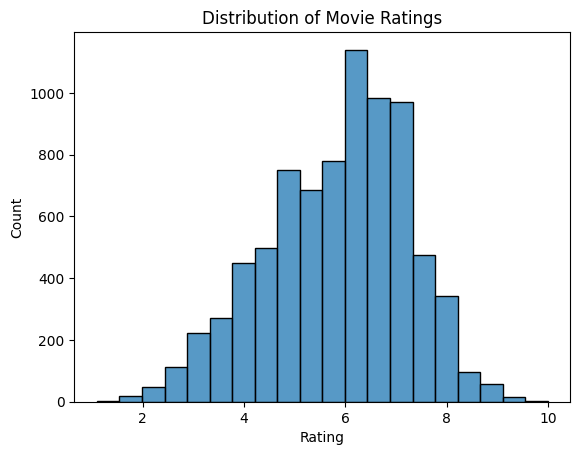

In [4]:
sns.histplot(df['Rating'], bins=20)
plt.title('Distribution of Movie Ratings')
plt.show()


In [5]:
df = df.dropna(subset=['Rating'])   # Drop rows where target is missing
df.fillna('Unknown', inplace=True)  # Replace other missing categorical values


<ipython-input-5-2386203166>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('Unknown', inplace=True)  # Replace other missing categorical values


In [6]:
le_genre = LabelEncoder()
le_director = LabelEncoder()
le_actor1 = LabelEncoder()
le_actor2 = LabelEncoder()
le_actor3 = LabelEncoder()

# After filtering, make a copy
df = df[df['Rating'].notnull()].copy()

df['Genre_encoded'] = le_genre.fit_transform(df['Genre'])
df['Director_encoded'] = le_director.fit_transform(df['Director'])
df['Actor 1_encoded'] = le_actor1.fit_transform(df['Actor 1'])
df['Actor 2_encoded'] = le_actor2.fit_transform(df['Actor 2'])
df['Actor 3_encoded'] = le_actor3.fit_transform(df['Actor 3'])


In [7]:
print(df.columns.tolist())

['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre_encoded', 'Director_encoded', 'Actor 1_encoded', 'Actor 2_encoded', 'Actor 3_encoded']


In [8]:
#feature selection
X = df[['Genre_encoded', 'Director_encoded', 'Actor 1_encoded','Actor 2_encoded','Actor 3_encoded']]
y = df['Rating']


In [9]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# building & training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
#predict & evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 1.793238025494594
R2 Score: 0.035450225863035256


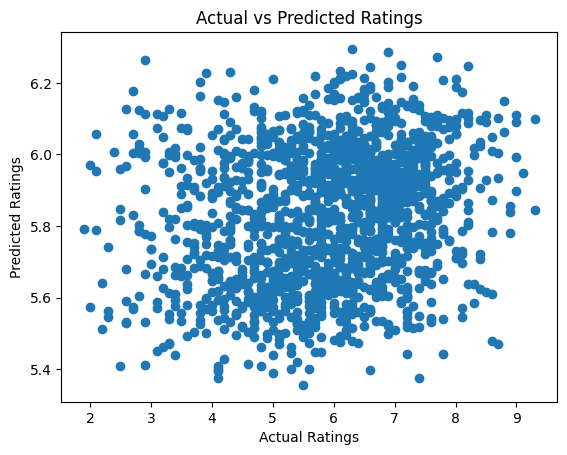

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()


In [13]:
import joblib
joblib.dump(model, 'movie_rating_model.pkl')

# Download the model file
from google.colab import files
files.download('movie_rating_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>